In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\bharath's file\DS\csv\Forest _fires.csv") 
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
df1 = df.drop(["month","day"], axis = 1)
df1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df1["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [5]:
df1.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
df1.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
## considering small as 0 and large as 1
df1.loc[df1["size_category"]=='small','size_category']=0
df1.loc[df1["size_category"]=='large','size_category']=1
df1["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [8]:
dataset = df1.values
dataset

array([[86.2, 26.2, 94.3, ..., 0, 0, 0],
       [90.6, 35.4, 669.1, ..., 1, 0, 0],
       [90.6, 43.7, 686.9, ..., 1, 0, 0],
       ...,
       [81.6, 56.7, 665.6, ..., 0, 0, 1],
       [94.4, 146.0, 614.7, ..., 0, 0, 0],
       [79.5, 3.0, 106.7, ..., 0, 0, 0]], dtype=object)

In [9]:
#Normalization being done.
def norm_func(i):
     x = (i-i.min())/(i.max()*i.min())
     return (x)

In [10]:
predictors = df1.iloc[:,0:28]
target = df1.iloc[:,28]

In [11]:
predictors1 = norm_func(predictors)


In [12]:
data = pd.concat([predictors1,target],axis=1)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(predictors1,target, test_size=0.3,stratify = target)

In [14]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer = "rmsprop",metrics = ["accuracy"])
    return model  

In [33]:
x_train = np.asarray(x_train).astype(int)
y_train = np.asarray(y_train).astype(int)

In [41]:
#y_train = pd.DataFrame(y_train)
    
first_model = prep_model([28,50,40,20,1])
hist = first_model.fit(np.array(x_train),np.array(y_train),epochs=500)
pred_train = first_model.predict(np.array(x_train))


Epoch 1/500
12/12 [==============================] - 1s 1ms/step - loss: 14366258.6923 - accuracy: 0.6174
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 5910949.2115 - accuracy: 0.6890
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 6089285.0769 - accuracy: 0.5844
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 7157475.3462 - accuracy: 0.5485
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 5430395.1346 - accuracy: 0.6097
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 3920808.4712 - accuracy: 0.6283
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 5283770.2596 - accuracy: 0.5608
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 3958257.4231 - accuracy: 0.7046
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 1215888.5192 - accuracy: 0.6251
Epoch 10/500
12/12 [==============================] - 

12/12 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.7229
Epoch 83/500
12/12 [==============================] - 0s 2ms/step - loss: 0.6055 - accuracy: 0.7123
Epoch 84/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.7308
Epoch 85/500
12/12 [==============================] - 0s 2ms/step - loss: 0.6127 - accuracy: 0.7009
Epoch 86/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5902 - accuracy: 0.7324
Epoch 87/500
12/12 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.7107
Epoch 88/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5826 - accuracy: 0.7417
Epoch 89/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5863 - accuracy: 0.7358
Epoch 90/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5848 - accuracy: 0.7371
Epoch 91/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.7507
Epoch 92/500


12/12 [==============================] - 0s 1ms/step - loss: 0.5803 - accuracy: 0.7332
Epoch 163/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5648 - accuracy: 0.7494
Epoch 164/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5484 - accuracy: 0.7664
Epoch 165/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5703 - accuracy: 0.7436
Epoch 166/500
12/12 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 0.7061
Epoch 167/500
12/12 [==============================] - 0s 2ms/step - loss: 0.6040 - accuracy: 0.7086
Epoch 168/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5507 - accuracy: 0.7638
Epoch 169/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5919 - accuracy: 0.7211
Epoch 170/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5925 - accuracy: 0.7206
Epoch 171/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5802 - accuracy: 0.7332
Epoc

12/12 [==============================] - 0s 1ms/step - loss: 0.5985 - accuracy: 0.7148
Epoch 244/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5962 - accuracy: 0.7170
Epoch 245/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5792 - accuracy: 0.7341
Epoch 246/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5808 - accuracy: 0.7325
Epoch 247/500
12/12 [==============================] - 0s 1ms/step - loss: 0.6083 - accuracy: 0.7049
Epoch 248/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5992 - accuracy: 0.7140
Epoch 249/500
12/12 [==============================] - 0s 1ms/step - loss: 0.6055 - accuracy: 0.7077
Epoch 250/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5607 - accuracy: 0.7525
Epoch 251/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5835 - accuracy: 0.7298
Epoch 252/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5713 - accuracy: 0.7420
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.7448
Epoch 325/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5654 - accuracy: 0.7478
Epoch 326/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5614 - accuracy: 0.7518
Epoch 327/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5500 - accuracy: 0.7632
Epoch 328/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5727 - accuracy: 0.7406
Epoch 329/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5636 - accuracy: 0.7496
Epoch 330/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5734 - accuracy: 0.7399
Epoch 331/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5580 - accuracy: 0.7553
Epoch 332/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5595 - accuracy: 0.7538
Epoch 333/500
12/12 [==============================] - 0s 1ms/step - loss: 0.6209 - accuracy: 0.6922
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.5623 - accuracy: 0.7508
Epoch 405/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5738 - accuracy: 0.7394
Epoch 406/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5642 - accuracy: 0.7489
Epoch 407/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5681 - accuracy: 0.7452
Epoch 408/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5833 - accuracy: 0.7300
Epoch 409/500
12/12 [==============================] - 0s 1ms/step - loss: 0.6118 - accuracy: 0.7016
Epoch 410/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5865 - accuracy: 0.7268
Epoch 411/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7419
Epoch 412/500
12/12 [==============================] - 0s 1ms/step - loss: 0.6006 - accuracy: 0.7128
Epoch 413/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5814 - accuracy: 0.7319
Epoc

12/12 [==============================] - 0s 1ms/step - loss: 0.5288 - accuracy: 0.7844
Epoch 486/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5646 - accuracy: 0.7487
Epoch 487/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5660 - accuracy: 0.7473
Epoch 488/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5401 - accuracy: 0.7730
Epoch 489/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5992 - accuracy: 0.7141
Epoch 490/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5849 - accuracy: 0.7284
Epoch 491/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5696 - accuracy: 0.7436
Epoch 492/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5956 - accuracy: 0.7177
Epoch 493/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5791 - accuracy: 0.7342
Epoch 494/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5465 - accuracy: 0.7667
Epoc

In [39]:
import matplotlib.pyplot as plt

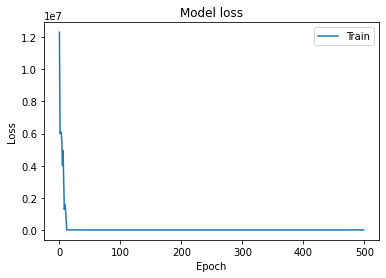

In [43]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

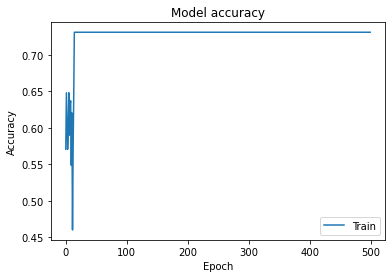

In [44]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [47]:
pred_target = first_model.predict(predictors)

In [48]:
pred_target

array([[2.70035118e-01],
       [1.24825031e-01],
       [9.92543101e-02],
       [3.20138812e-01],
       [3.49071920e-01],
       [2.60996521e-01],
       [2.34062046e-01],
       [1.42415464e-01],
       [9.77095366e-02],
       [9.63362455e-02],
       [1.03198409e-01],
       [9.54819620e-02],
       [8.32742453e-02],
       [8.51894319e-02],
       [1.00106210e-01],
       [9.12247002e-02],
       [2.25096881e-01],
       [1.07662648e-01],
       [2.30118811e-01],
       [2.59341180e-01],
       [7.64481723e-02],
       [7.71920085e-02],
       [3.00376654e-01],
       [2.12920785e-01],
       [1.80415362e-01],
       [1.67270273e-01],
       [9.95773375e-02],
       [8.49538147e-02],
       [9.06617641e-02],
       [7.45401084e-02],
       [1.16645187e-01],
       [9.62406397e-02],
       [7.88640380e-02],
       [7.73552954e-02],
       [8.49825144e-02],
       [8.74840021e-02],
       [1.65260404e-01],
       [9.37841237e-02],
       [1.23381019e-01],
       [2.46878505e-01],
